In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 
%matplotlib inline 

In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.shape

(96453, 12)

In [4]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [5]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### Now change Data type of column df['Formatted Date'] (object) ==> (datetime)

In [6]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc= True)
df['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [7]:
# We will check if any Nan value is present or not? 
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

### We only need 3 columns for our task which is df['Formatted Date','Apperent Temperature(c)','Humidity']

## We need to find Avg Apparent temperature & Avg humidity of specific month from 2006 - 2016.


In [8]:
# First we set Formatted Date as our index, because we need every year data of a specific month. 
df = df.set_index('Formatted Date')
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [9]:
# We need only 2 columns from our Dataset. so will fetched that columns only. 
cols = df[['Apparent Temperature (C)','Humidity']] 
df_avg = cols.resample('MS').mean()
# "MS" ==> Month starting 
# We are actually displaying the avg apparent temperature (C) and humidity using mean()
df_avg.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


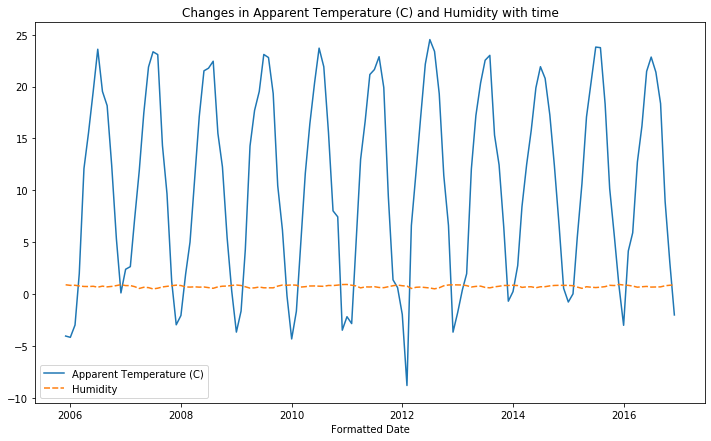

In [10]:
# We will plot both value with respect to datetime i.e. index column to check variation in data. 
plt.figure(figsize=(12,7))
plt.title("Changes in Apparent Temperature (C) and Humidity with time")
sns.lineplot(data=df_avg);

## Conclusion:- 
1. For 10 years, Average Apparent Temperature change by month-month in that specific year only and remain same for every year.
2. No any change in Average humidity, i.e. straight line parallel to X-axis. That means for 10 years the humidity is approximately constant. 

In [11]:
# Now we will find particular month == 'April' as per question. 
# we will extract only April month data using index.month == 4. 
data = df_avg[df_avg.index.month==4]
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-04-01 00:00:00+00:00,12.098827,0.728625
2007-04-01 00:00:00+00:00,11.894421,0.536361
2008-04-01 00:00:00+00:00,11.183688,0.693194
2009-04-01 00:00:00+00:00,14.267076,0.567847
2010-04-01 00:00:00+00:00,11.639406,0.706875
2011-04-01 00:00:00+00:00,12.978997,0.591625
2012-04-01 00:00:00+00:00,11.782770,0.650222
2013-04-01 00:00:00+00:00,12.045563,0.677667
2014-04-01 00:00:00+00:00,12.486181,0.691403


In [13]:
import matplotlib.dates as dts

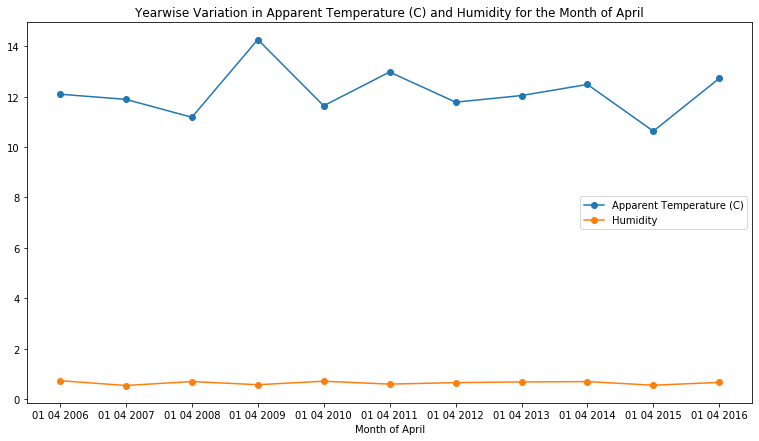

In [14]:
# Now we will subplot the 2 variable with respect to index value. 

fig, st = plt.subplots(figsize = (13,7))

st.plot(data.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'],marker='o', linestyle='-',label='Apparent Temperature (C)');
st.plot(data.loc['2006-04-01':'2016-04-01', 'Humidity'],marker='o', linestyle='-',label='Humidity');
st.set_xticks(['04-01-2006','04-01-2007','04-01-2008','04-01-2009',
               '04-01-2010','04-01-2011','04-01-2012','04-01-2013','04-01-2014','04-01-2015','04-01-2016'])
st.xaxis.set_major_formatter(dts.DateFormatter('%d %m %Y'))
st.set_xlabel('Month of April')
st.legend(loc = 'center right')
plt.title("Yearwise Variation in Apparent Temperature (C) and Humidity for the Month of April");

## Final Conclusion : - 
1. Average Apparent Temperature (c) increase for year 2008-09 and then again decrease from 2009-10 to its average level. Then slighlty increase for period 2010-11 and then drop again for year 2011-12. For year 2014-15 it decrease drastically and then come to average level for year 2015-16. 
2. It observed, for year 2009 the Apparent Temperature is at Highest 14.26(C) and for year 2015 the Apparent Temperature is at lowest 10.63(C). 
3. There is no any change in average Humidity for given year 2006-2016. The humidity graph line is approximately parallel to the X-axis.  